In [1]:
import pandas as pd

# Equivalent of numpy & matplotlib
%pylab inline

import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


#### Lecture des données

In [2]:
data_2015 = pd.read_csv('C:/Users/azade/Desktop/OC/Projet 4/2015-building-energy-benchmarking.csv')
data_2016 = pd.read_csv('C:/Users/azade/Desktop/OC/Projet 4/2016-building-energy-benchmarking.csv')

## Description des données

#### Affichage des données

In [3]:
print(data_2015.shape)
print(data_2016.shape)

(3340, 47)
(3376, 46)


In [4]:
print(data_2015.info())
print(data_2016.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

Il y a des colonnes avec de nombreuses valeurs manquantes.

Essayer de supprimer toutes les colonnes qui n'ont pas assez valeurs.

#### Suppression de colonnes avec plus de valeurs manquantes 2015

In [5]:
data_2015.isnull().sum().sort_values(ascending=False).head(10)

Comment                            3327
Outlier                            3256
YearsENERGYSTARCertified           3230
City Council Districts             3127
2010 Census Tracts                 3116
ThirdLargestPropertyUseTypeGFA     2780
ThirdLargestPropertyUseType        2780
SecondLargestPropertyUseTypeGFA    1781
SecondLargestPropertyUseType       1781
ENERGYSTARScore                     780
dtype: int64

In [6]:
data_2015.drop(['Comment','Outlier','YearsENERGYSTARCertified','City Council Districts',
                  '2010 Census Tracts','ThirdLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType'],axis=1,
                inplace=True)

In [7]:
data_2015.shape

(3340, 40)

#### Suppression de colonnes avec plus de valeurs manquantes 2016

In [8]:
data_2016.isnull().sum().sort_values(ascending=False).head(8)

Comments                           3376
Outlier                            3344
YearsENERGYSTARCertified           3257
ThirdLargestPropertyUseType        2780
ThirdLargestPropertyUseTypeGFA     2780
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697
ENERGYSTARScore                     843
dtype: int64

#### Removing observation with 'high outliers'

In [9]:
data_2016.drop(['Comments','Outlier','YearsENERGYSTARCertified','ThirdLargestPropertyUseTypeGFA',
                'ThirdLargestPropertyUseType'],axis=1,inplace=True)

In [10]:
data_2016.shape

(3376, 41)

### Concaténation des données

#### Colonnes communes en 2015 et 2016

In [11]:
set(data_2016.columns).intersection(set(data_2015.columns))

{'BuildingType',
 'ComplianceStatus',
 'CouncilDistrictCode',
 'DataYear',
 'DefaultData',
 'ENERGYSTARScore',
 'Electricity(kBtu)',
 'Electricity(kWh)',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'ListOfAllPropertyUseTypes',
 'NaturalGas(kBtu)',
 'NaturalGas(therms)',
 'Neighborhood',
 'NumberofBuildings',
 'NumberofFloors',
 'OSEBuildingID',
 'PrimaryPropertyType',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'PropertyGFATotal',
 'PropertyName',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SteamUse(kBtu)',
 'TaxParcelIdentificationNumber',
 'YearBuilt'}

In [12]:
set(data_2016.columns).intersection(set(data_2015.columns))

{'BuildingType',
 'ComplianceStatus',
 'CouncilDistrictCode',
 'DataYear',
 'DefaultData',
 'ENERGYSTARScore',
 'Electricity(kBtu)',
 'Electricity(kWh)',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'ListOfAllPropertyUseTypes',
 'NaturalGas(kBtu)',
 'NaturalGas(therms)',
 'Neighborhood',
 'NumberofBuildings',
 'NumberofFloors',
 'OSEBuildingID',
 'PrimaryPropertyType',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'PropertyGFATotal',
 'PropertyName',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SteamUse(kBtu)',
 'TaxParcelIdentificationNumber',
 'YearBuilt'}

In [13]:
set(data_2016.columns).difference(set(data_2015.columns))

{'Address',
 'City',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'State',
 'TotalGHGEmissions',
 'ZipCode'}

In [14]:
set(data_2015.columns).difference(set(data_2016.columns))

{'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Location',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes'}

__GHGEmissions(MetricTonsCO2e):__ The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu.

__GHGEmissionsIntensity(kgCO2e/ft2):__ Total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot. This calculation uses a GHG emissions factor from Seattle City Light's portfolio of generating resources

In [15]:
# On renomme les colonnes de 2015 pour que les noms des variables soient les mêmes que pour 2016 (Energy et CO2)
data_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions',
                        'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity',
                          'Zip Codes':'ZipCode'}, inplace=True)

#### Scission de la colonne 'Location' en 'latitude' et 'longitude'

__Location__ est inclus: 
address, state , zip, longitude, latitude and ..


La latitude et la longitude sont les coordonnées géographiques qui permettent de repérer un point à la surface de la Terre.

In [16]:
import ast
data_2015['Latitude']=data_2015.Location.apply(lambda x:ast.literal_eval(x)['latitude'])
data_2015['Longitude']=data_2015.Location.apply(lambda x:ast.literal_eval(x)['longitude'])

In [17]:
data_2015.drop('Location', axis=1, inplace=True)

In [18]:
set(data_2015.columns).difference(set(data_2016.columns))

{'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas'}

In [19]:
data_2015.drop(['OtherFuelUse(kBtu)', 'Seattle Police Department Micro Community Policing Plan Areas',
 'SPD Beats'], axis=1, inplace= True)

#### Suppression de colonnes extra pour les données 2016

In [20]:
data_2016.drop(['Address', 'City', 'State'],inplace=True, axis=1)

In [21]:
print(data_2015.shape)
print(data_2016.shape)

(3340, 38)
(3376, 38)


### Ajouter deux jeux de données

In [22]:
data= pd.concat([data_2015, data_2016])

# to see all the columns
pd.set_option('display.max_columns', None)
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,ZipCode,Latitude,Longitude
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,No,Compliant,18081.0,47.61219025,-122.33799744
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,No,Compliant,18081.0,47.61310583,-122.33335756
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92,Yes,Compliant,18081.0,47.61334897,-122.33769944
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,1936.34,31.38,No,Compliant,18081.0,47.61421585,-122.33660889
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,507.70,4.02,No,Compliant,19576.0,47.6137544,-122.3409238


In [23]:
data.shape

(6716, 38)

#### Vérification des valeurs en double

In [24]:
data.duplicated(['OSEBuildingID','DataYear']).sum()

0

#### Structure des données

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6716 non-null   int64  
 1   DataYear                         6716 non-null   int64  
 2   BuildingType                     6716 non-null   object 
 3   PrimaryPropertyType              6716 non-null   object 
 4   PropertyName                     6716 non-null   object 
 5   TaxParcelIdentificationNumber    6714 non-null   object 
 6   CouncilDistrictCode              6716 non-null   int64  
 7   Neighborhood                     6716 non-null   object 
 8   YearBuilt                        6716 non-null   int64  
 9   NumberofBuildings                6708 non-null   float64
 10  NumberofFloors                   6708 non-null   float64
 11  PropertyGFATotal                 6716 non-null   int64  
 12  PropertyGFAParking  

 ## 2. Nettoyage des données

### Feature selection

#### Target: 'SiteEnergyUse(kBtu)' & 'TotalGHGEmissions'

Suppresion des colonnes non pertinentes

In [26]:
data.drop(['OSEBuildingID','PropertyName','TaxParcelIdentificationNumber','CouncilDistrictCode',
          'DefaultData','ComplianceStatus'], axis=1, inplace= True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6716 entries, 0 to 3375
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         6716 non-null   int64  
 1   BuildingType                     6716 non-null   object 
 2   PrimaryPropertyType              6716 non-null   object 
 3   Neighborhood                     6716 non-null   object 
 4   YearBuilt                        6716 non-null   int64  
 5   NumberofBuildings                6708 non-null   float64
 6   NumberofFloors                   6708 non-null   float64
 7   PropertyGFATotal                 6716 non-null   int64  
 8   PropertyGFAParking               6716 non-null   int64  
 9   PropertyGFABuilding(s)           6716 non-null   int64  
 10  ListOfAllPropertyUseTypes        6580 non-null   object 
 11  LargestPropertyUseType           6560 non-null   object 
 12  LargestPropertyUseTy

#### Supprimer les colonnes extra:

__Electricity(kBtu)__	
The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in thousands of British thermal units (kBtu).

__Electricity(kWh)__	
The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in kWh.

__NaturalGas(therms)__
The annual amount of utility-supplied natural gas consumed by the property, measured in therms.

__NaturalGas(kBtu)__
The annual amount of utility-supplied natural gas consumed by the property, measured in British thermal unit(s).

One therm equals 100,000 Btu

In [28]:
#Suppression des variables redondantes
redundant_features = ['NaturalGas(therms)','Electricity(kWh)']
data.drop(redundant_features, axis=1, inplace=True)

In [29]:
data.shape

(6716, 30)

Dans le cadre de nos modélisations, les variables à prédire sont la consommation d'énergie du bâtiment (SiteEnergyUse(kBtu)) et ses émissions de CO2 (TotalGHGEmissions). Certaines lignes comportent des manquants sur ces variables, nous allons donc les supprimer :

In [30]:
data = data[~((data['SiteEnergyUse(kBtu)'].isnull()) | (data['TotalGHGEmissions'].isnull()))]

In [31]:
data.shape

(6697, 30)

### Data Exploration

#### Property visualization

In [32]:
num_var = data.dtypes[data.dtypes.values != 'object'].index
num_var

Index(['DataYear', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'ZipCode'],
      dtype='object')

Text(0.5, 0, '')

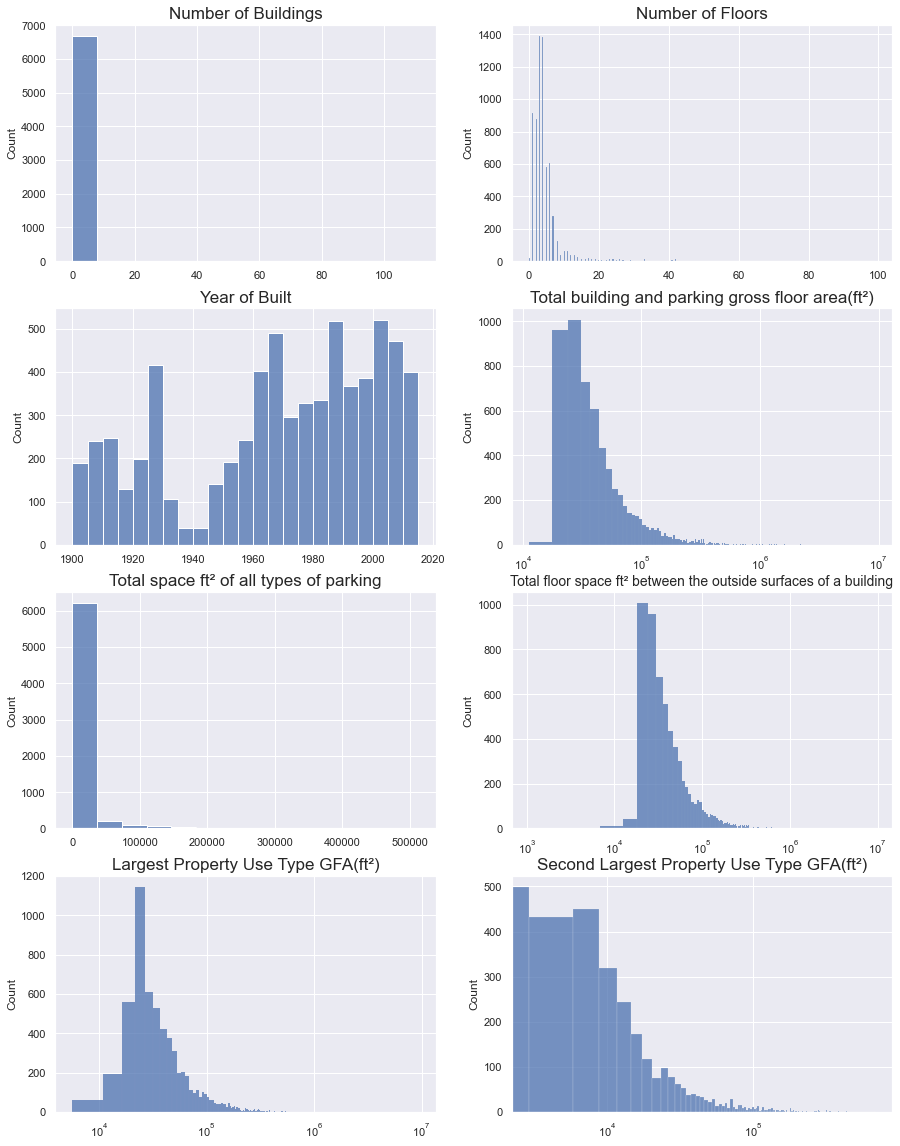

In [33]:
sns.set(font_scale=1.0)
plt.figure(figsize=(15,20))

plt.subplot(4,2,3)
sns.histplot(x="YearBuilt", data=data)
plt.title("Year of Built", fontsize=17)
plt.xlabel("")

plt.subplot(4,2,1)
sns.histplot(x="NumberofBuildings", data=data)
plt.title("Number of Buildings", fontsize=17)
plt.xlabel("")

plt.subplot(4,2,2)
sns.histplot(x="NumberofFloors", data=data)
plt.title("Number of Floors", fontsize=17)
plt.xlabel("")

plt.subplot(4,2,8)
sns.histplot(x="SecondLargestPropertyUseTypeGFA", data=data)
plt.xscale('log')
plt.title("Second Largest Property Use Type GFA(ft²)", fontsize=17)
plt.xlabel("")

plt.subplot(4,2,5)
sns.histplot(x="PropertyGFAParking", data=data)
plt.title("Total space ft² of all types of parking", fontsize=17)
plt.xlabel("")

plt.subplot(4,2,6)
sns.histplot(x="PropertyGFABuilding(s)", data=data)
plt.xscale('log')
plt.title("Total floor space ft² between the outside surfaces of a building", fontsize=14)
plt.xlabel("")

plt.subplot(4,2,7)
sns.histplot(x="LargestPropertyUseTypeGFA", data=data)
plt.xscale('log')
plt.title("Largest Property Use Type GFA(ft²)", fontsize=17)
plt.xlabel("")

plt.subplot(4,2,4)
sns.histplot(x="PropertyGFATotal", data=data)
plt.xscale('log')
plt.title("Total building and parking gross floor area(ft²)", fontsize=17)
plt.xlabel("")

#### Energy visualization

Text(0.5, 0, '')

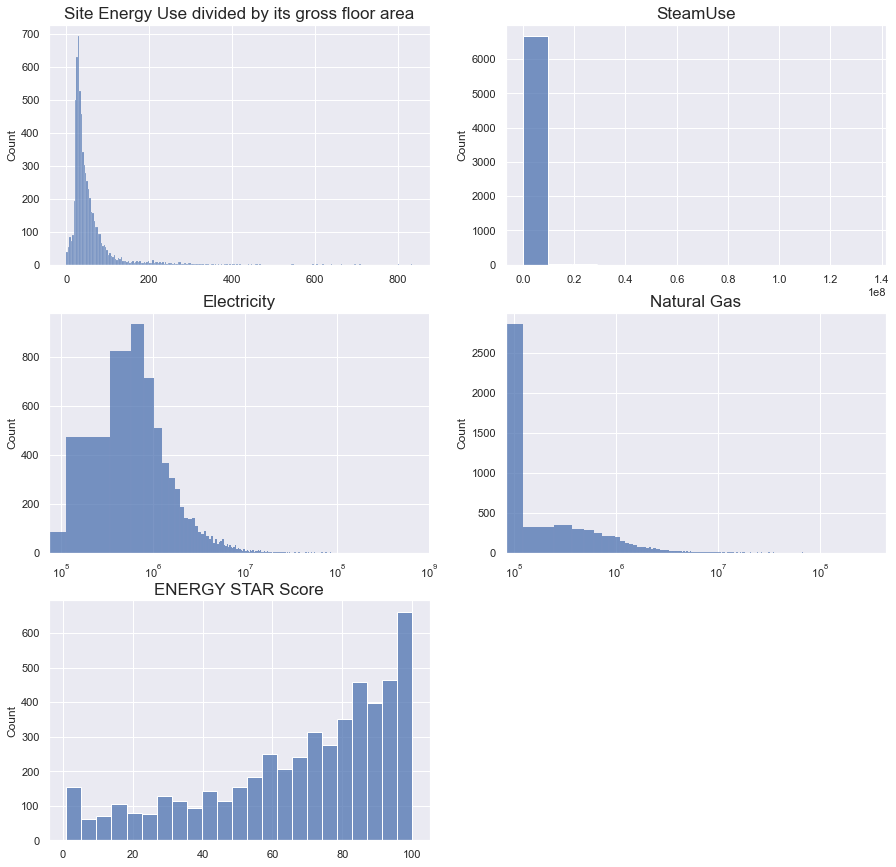

In [34]:
sns.set(font_scale=1.0)
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.histplot(x="SiteEUI(kBtu/sf)", data=data)
plt.title("Site Energy Use divided by its gross floor area", fontsize=17)
plt.xlabel("")

plt.subplot(3,2,2)
sns.histplot(x="SteamUse(kBtu)", data=data)
plt.title("SteamUse", fontsize=17)
plt.xlabel("")

plt.subplot(3,2,3)
sns.histplot(x="Electricity(kBtu)", data=data)
plt.xscale('log')
plt.title("Electricity", fontsize=17)
plt.xlabel("")

plt.subplot(3,2,4)
sns.histplot(x="NaturalGas(kBtu)", data=data)
plt.xscale('log')
plt.title("Natural Gas", fontsize=17)
plt.xlabel("")

#An EPA calculated 1-100 rating that assesses a property’s overall energy performance, based on national data to 
#control for differences among climate, building uses, and operations. A score of 50 represents the national median.
plt.subplot(3,2,5)
sns.histplot(x="ENERGYSTARScore", data=data)
plt.title("ENERGY STAR Score", fontsize=17)
plt.xlabel("")

### CO2 & Energy

Text(0.5, 0, '')

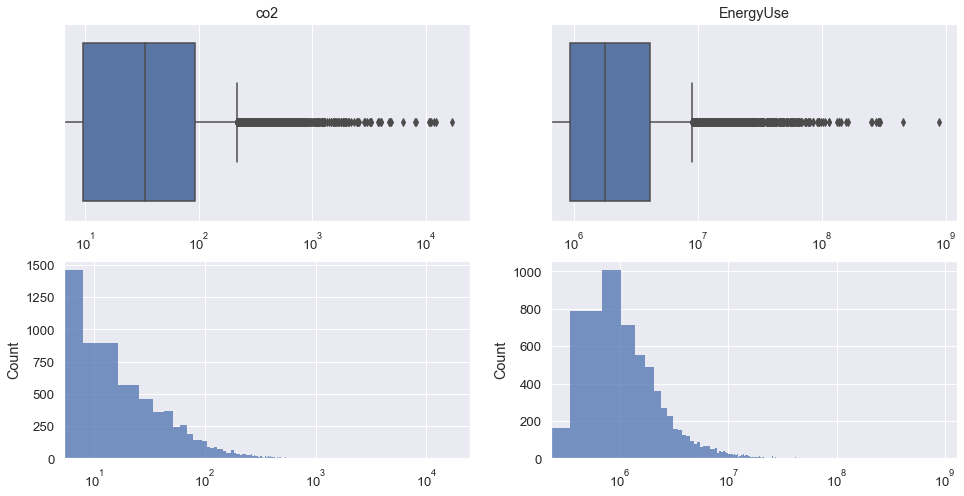

In [35]:
sns.set(font_scale=1.2)
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.boxplot(data=data, x="TotalGHGEmissions")
plt.xscale('log')
plt.xlabel("")
plt.title("co2")

plt.subplot(2,2,2)
sns.boxplot(data=data, x="SiteEnergyUse(kBtu)")
plt.xscale('log')
plt.xlabel("")
plt.title("EnergyUse")

plt.subplot(2,2,3)
sns.histplot(data=data, x="TotalGHGEmissions")
plt.xscale('log')
plt.xlabel("")

plt.subplot(2,2,4)
sns.histplot(data=data, x="SiteEnergyUse(kBtu)")
plt.xscale('log')
plt.xlabel("")

#### Matrics de corrolation

(0.0, 22.0)

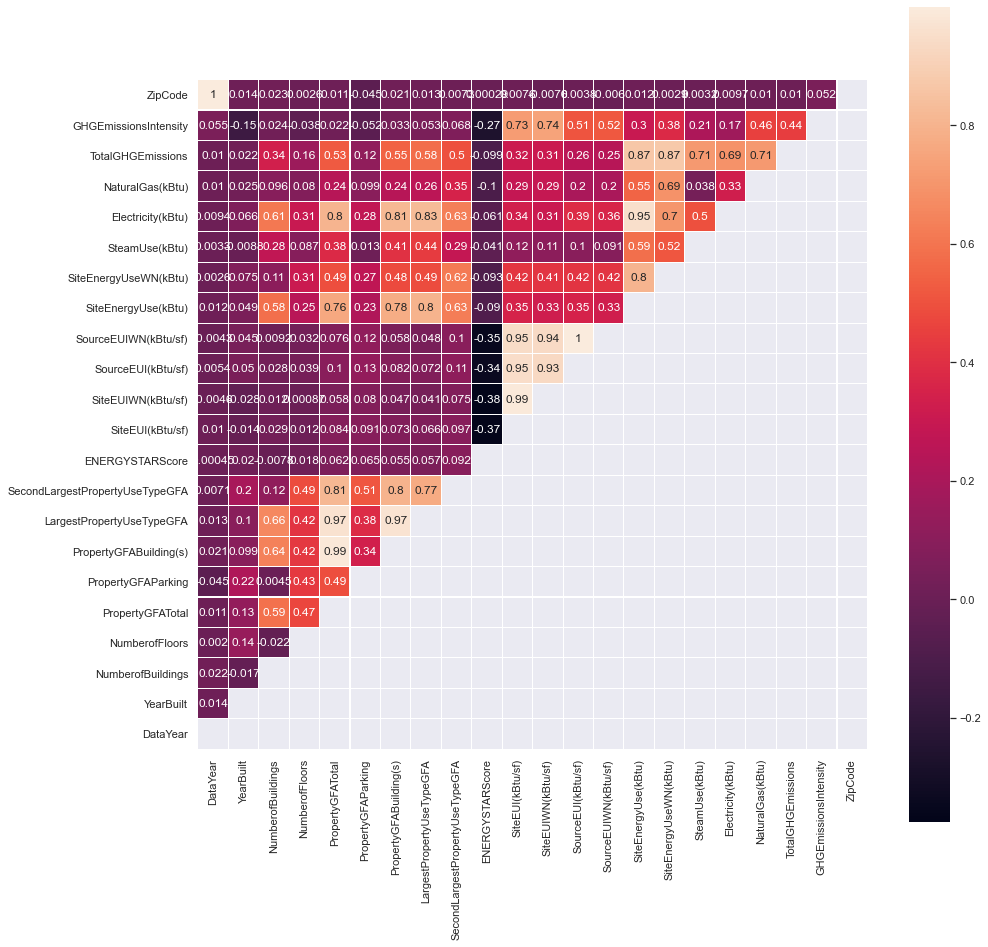

In [36]:
sns.set(font_scale=1.0)
corr_matrix = data.corr()
fig = plt.figure(1, figsize=(15, 15))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix, mask=mask, square=True, linewidths=0.1, annot=True)
plt.xlim(0, corr_matrix.shape[1])
plt.ylim(0, corr_matrix.shape[0])


- Le "DataYear" est fortement corrélée à la "ZipCode".
- Le 'SourceEUIWN(kBtu/sf)' est fortement corrélée à les 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)'.

- La consommation totale d'énergie "Electricity(kBtu)" est fortement corrélée à la surface des bâtiments "PropertyGFABuilding(s)", "PropertyGFATotal" & "LargestPropertyUseTypeGFA".
- Les émissions de Co2 sont fortement corrélées à la consommation totale d'énergie

donc supprimées pour éviter la redondance d'informations

In [35]:
data= data.drop(columns=['ZipCode','SourceEUIWN(kBtu/sf)','SiteEUIWN(kBtu/sf)','PropertyGFATotal',
                      'SourceEUI(kBtu/sf)','SecondLargestPropertyUseTypeGFA','Electricity(kBtu)',
                      'GHGEmissionsIntensity','SiteEnergyUseWN(kBtu)','LargestPropertyUseTypeGFA'])

(0.0, 12.0)

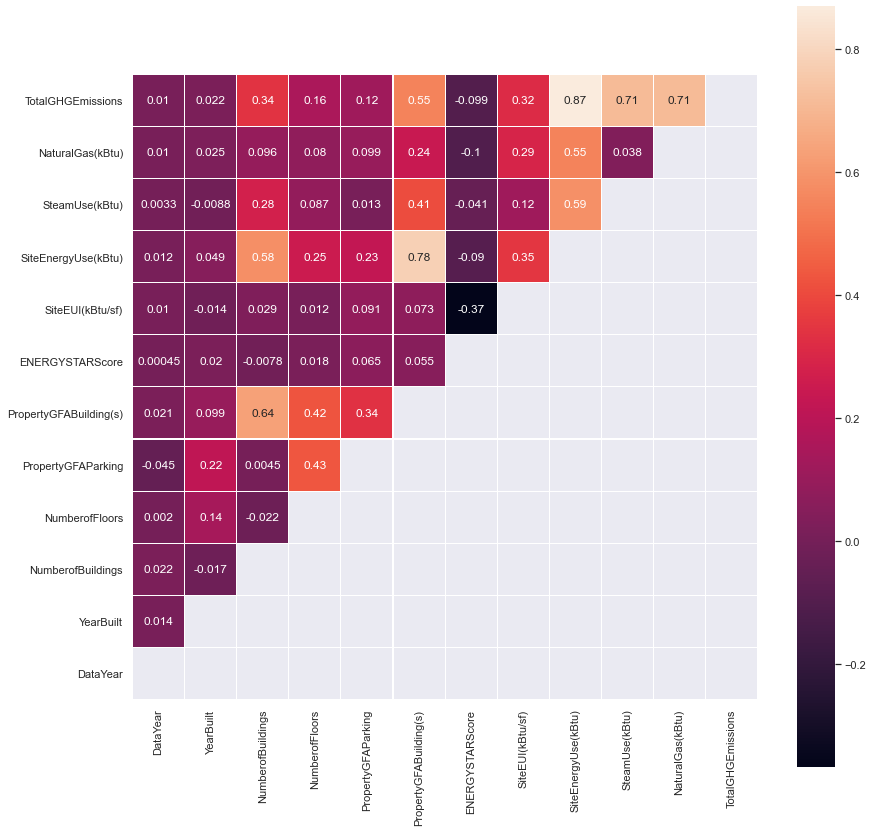

In [38]:
sns.set(font_scale=1.0)
corr_matrix = data.corr()
fig = plt.figure(1, figsize=(14, 14))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix, mask=mask, square=True, linewidths=0.1, annot=True)
plt.xlim(0, corr_matrix.shape[1])
plt.ylim(0, corr_matrix.shape[0])


#### Changer le type de "Latitude" & "Longitude"

In [36]:
data = data.astype({"Latitude":'float64',"Longitude":'float64'}) 

### Data Exploration- Qualitative

In [37]:
# Les colonnes object dtypes sont séléctionnés
cat_var = list(data.select_dtypes(include=['object', 'bool']).columns)

In [38]:
print("Les variables catégorielles sont les suivantes : \n")
for categ in cat_var :
    print(categ, ":", data[categ].nunique())

Les variables catégorielles sont les suivantes : 

BuildingType : 8
PrimaryPropertyType : 32
Neighborhood : 19
ListOfAllPropertyUseTypes : 488
LargestPropertyUseType : 57
SecondLargestPropertyUseType : 50


In [39]:
data=data.drop(columns=["ListOfAllPropertyUseTypes"])

In [40]:
data.shape

(6697, 19)

Text(0.5, 1.0, 'Neighborhood')

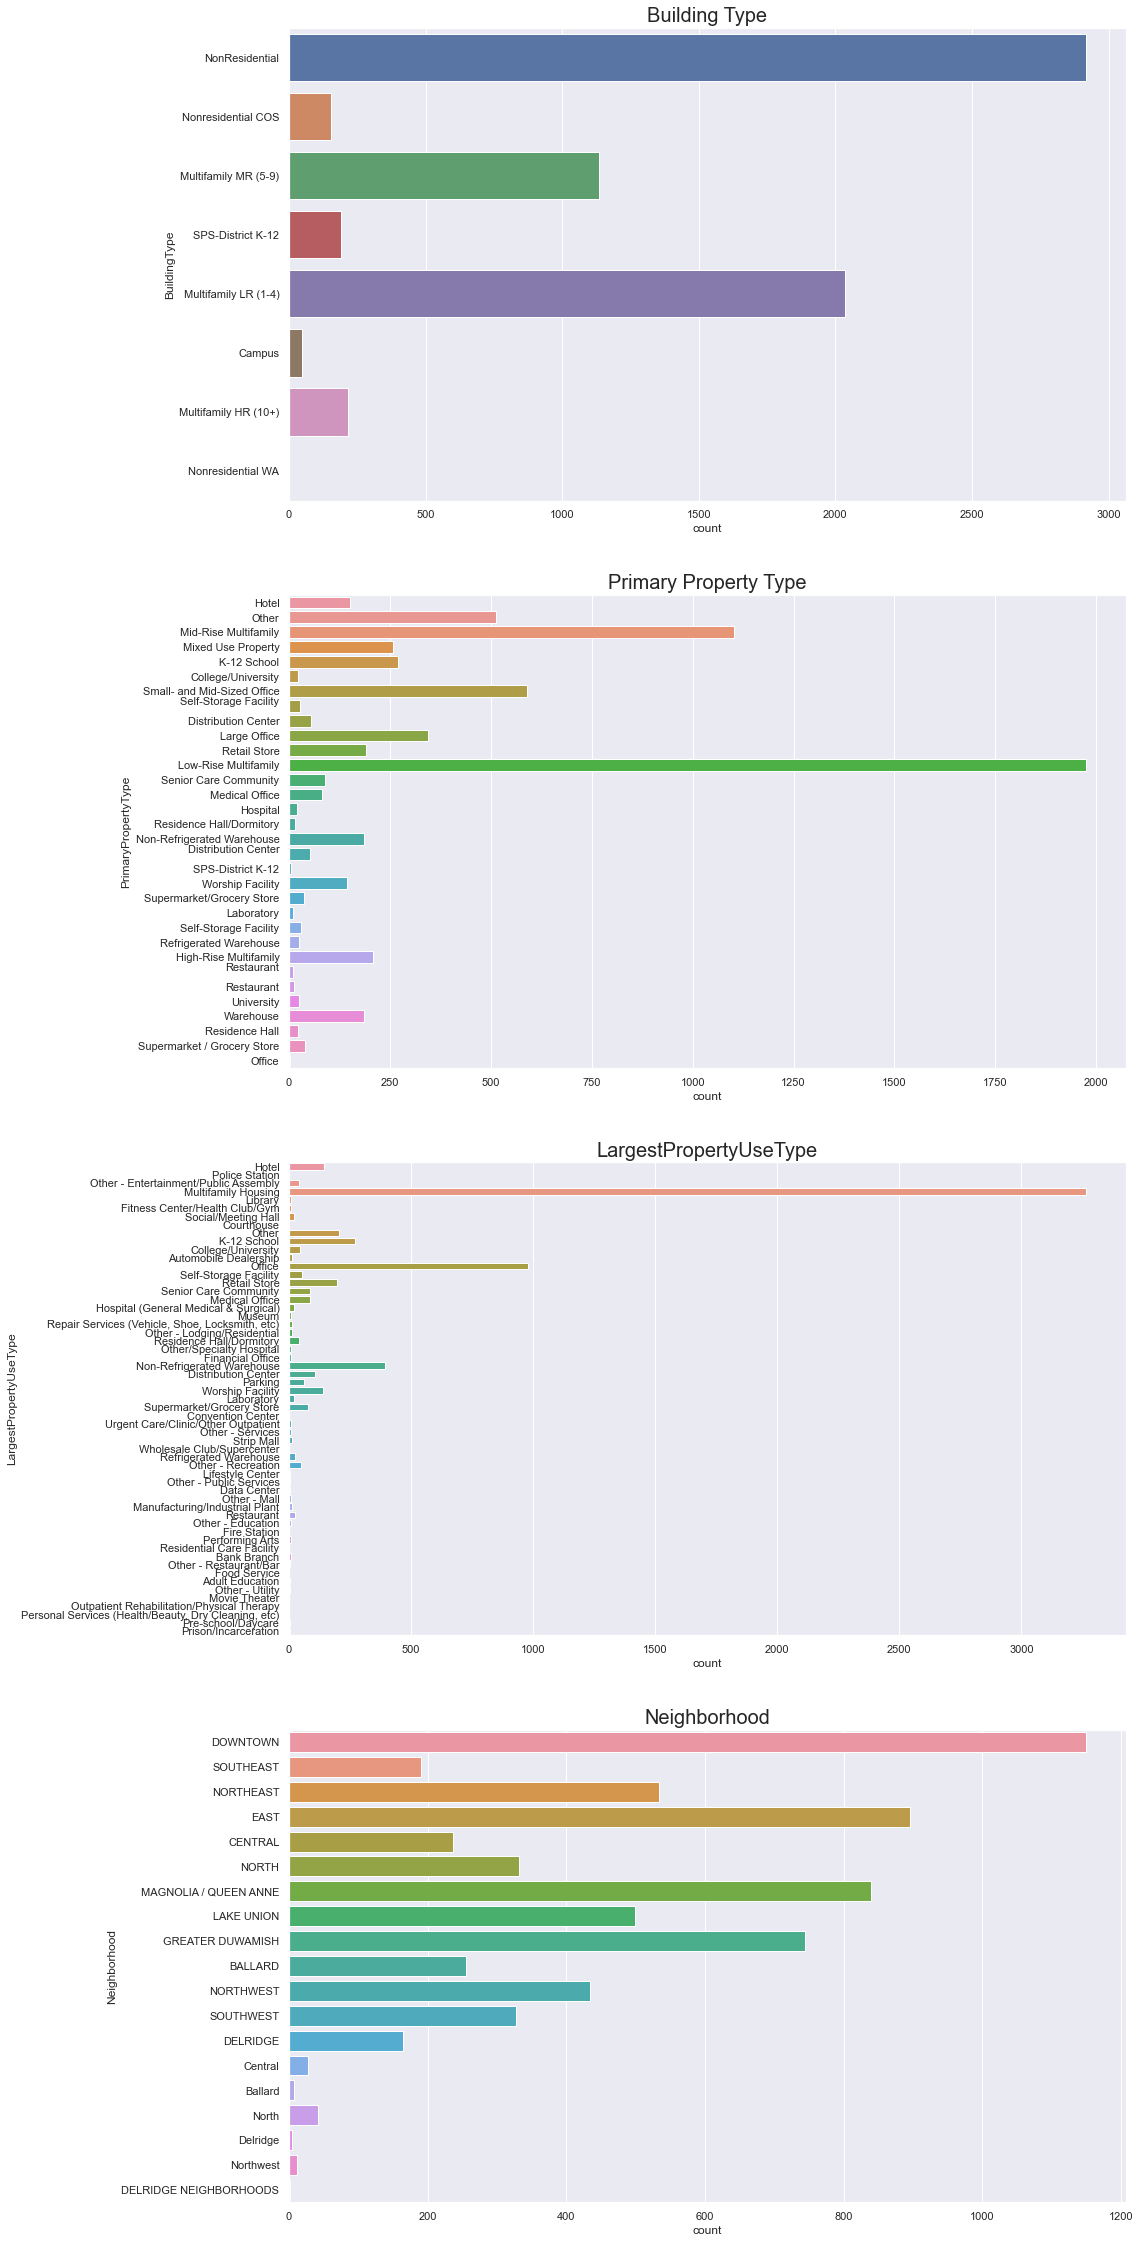

In [44]:
sns.set(font_scale=1.0)
plt.figure(figsize=(15,40))

plt.subplot(4,1,1)
sns.countplot(y="BuildingType", data=data)
plt.title("Building Type", fontsize=20)

plt.subplot(4,1,2)
sns.countplot(y="PrimaryPropertyType", data=data)
plt.title("Primary Property Type", fontsize=20)

plt.subplot(4,1,3)
sns.countplot(y="LargestPropertyUseType", data=data)
plt.title("LargestPropertyUseType", fontsize=20)
plt.subplot(4,1,4)
sns.countplot(y="Neighborhood", data=data)
plt.title("Neighborhood", fontsize=20)


## 3. Préparation des données

### objectif : émissions des bâtiments non destinés à l’habitation.

In [41]:
data

,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,SecondLargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),NaturalGas(kBtu),TotalGHGEmissions,Latitude,Longitude
0,2015,NonResidential,Hotel,DOWNTOWN,1927,1.0,12.0,0,88434,Hotel,NaN,65.0,78.900000,6.981428e+06,2023032.0,1.272388e+06,249.43,47.612190,-122.337997
1,2015,NonResidential,Hotel,DOWNTOWN,1996,1.0,11.0,15064,88502,Hotel,Parking,51.0,94.400000,8.354235e+06,0.0,4.448985e+06,263.51,47.613106,-122.333358
2,2015,NonResidential,Hotel,DOWNTOWN,1969,1.0,41.0,0,961990,Hotel,Parking,18.0,96.600000,7.313066e+07,19660404.0,3.709900e+06,2061.48,47.613349,-122.337699
3,2015,NonResidential,Hotel,DOWNTOWN,1926,1.0,10.0,0,61320,Hotel,NaN,1.0,460.400000,2.822932e+07,23458518.0,2.001894e+06,1936.34,47.614216,-122.336609
4,2015,NonResidential,Hotel,DOWNTOWN,1980,1.0,18.0,12460,107430,Hotel,Parking,67.0,120.100000,1.482910e+07,0.0,8.763105e+06,507.70,47.613754,-122.340924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,2016,Nonresidential COS,Office,GREATER DUWAMISH,1990,1.0,1.0,0,12294,Office,NaN,46.0,69.099998,8.497457e+05,0.0,3.254750e+05,20.94,47.567220,-122.311540
3372,2016,Nonresidential COS,Other,DOWNTOWN,2004,1.0,1.0,0,16000,Other - Recreation,NaN,NaN,59.400002,9.502762e+05,0.0,5.537300e+05,32.17,47.596250,-122.322830
3373,2016,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,0,13157,Other - Recreation,Fitness Center/Health Club/Gym,NaN,438.200012,5.765898e+06,0.0,3.973739e+06,223.54,47.636440,-122.357840
3374,2016,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,1989,1.0,1.0,0,14101,Other - Recreation,Fitness Center/Health Club/Gym,NaN,51.000000,7.194712e+05,0.0,3.706010e+05,22.11,47.528320,-122.324310


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6697 entries, 0 to 3375
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DataYear                      6697 non-null   int64  
 1   BuildingType                  6697 non-null   object 
 2   PrimaryPropertyType           6697 non-null   object 
 3   Neighborhood                  6697 non-null   object 
 4   YearBuilt                     6697 non-null   int64  
 5   NumberofBuildings             6697 non-null   float64
 6   NumberofFloors                6689 non-null   float64
 7   PropertyGFAParking            6697 non-null   int64  
 8   PropertyGFABuilding(s)        6697 non-null   int64  
 9   LargestPropertyUseType        6553 non-null   object 
 10  SecondLargestPropertyUseType  3237 non-null   object 
 11  ENERGYSTARScore               5093 non-null   float64
 12  SiteEUI(kBtu/sf)              6695 non-null   float64
 13  Sit

In [43]:
# Nombre d'occurences par 'BuildingType'
data["BuildingType"].value_counts()

NonResidential          2918
Multifamily LR (1-4)    2037
Multifamily MR (5-9)    1134
Multifamily HR (10+)     217
SPS-District K-12        191
Nonresidential COS       153
Campus                    46
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [44]:
categories_to_keep = ['NonResidential', 'SPS-District K-12', 'Nonresidential COS','Nonresidential WA']
data = data[data.BuildingType.isin(categories_to_keep)]
data.shape

(3263, 19)

### Grouping operations

In [42]:
# Nombre d'occurences par 'PrimaryPropertyType'
data["PrimaryPropertyType"].value_counts()

Small- and Mid-Sized Office    587
Other                          488
Large Office                   342
K-12 School                    261
Mixed Use Property             212
Retail Store                   191
Warehouse                      187
Non-Refrigerated Warehouse     187
Hotel                          149
Worship Facility               143
Medical Office                  82
Distribution Center             55
Distribution Center\n           51
Supermarket / Grocery Store     40
Senior Care Community           39
Supermarket/Grocery Store       36
Self-Storage Facility           29
Self-Storage Facility\n         27
Refrigerated Warehouse          25
Residence Hall                  21
Hospital                        20
University                      18
College/University              16
Residence Hall/Dormitory        15
Restaurant                      12
Laboratory                      11
Restaurant\n                     9
SPS-District K-12                4
Low-Rise Multifamily

In [45]:
# Suppresion de Low-Rise Multifamily & Residence Hall/Dormitory
data = data.loc[~data["PrimaryPropertyType"].isin(["Low-Rise Multifamily"])]
data = data.loc[~data["PrimaryPropertyType"].isin(["Residence Hall/Dormitory"])]

In [46]:
# Renommage de les valeur en "PrimaryPropertyType"
data.loc[data["PrimaryPropertyType"] == "Restaurant\n", "PrimaryPropertyType"] = "Restaurant"
data.loc[data["PrimaryPropertyType"] == "Self-Storage Facility\n", "PrimaryPropertyType"] = "Self-Storage Facility"

data.loc[data["PrimaryPropertyType"] == "Distribution Center\n", "PrimaryPropertyType"] = "Distribution Center"
data.loc[data["PrimaryPropertyType"] == "Supermarket / Grocery Store", "PrimaryPropertyType"] = "Supermarket/Grocery Store"

data.loc[data["PrimaryPropertyType"] == "University", "PrimaryPropertyType"] = "College/University"
data.loc[data["PrimaryPropertyType"] == "Non-Refrigerated Warehouse", "PrimaryPropertyType"] = "Warehouse"

data.loc[data["PrimaryPropertyType"] == "Office", "PrimaryPropertyType"] = "Small- and Mid-Sized Office"
data.loc[data["PrimaryPropertyType"] == "SPS-District K-12", "PrimaryPropertyType"] = "K-12 School"

In [47]:
data["PrimaryPropertyType"].value_counts()

Small- and Mid-Sized Office    590
Other                          488
Warehouse                      374
Large Office                   342
K-12 School                    265
Mixed Use Property             212
Retail Store                   191
Hotel                          149
Worship Facility               143
Distribution Center            106
Medical Office                  82
Supermarket/Grocery Store       76
Self-Storage Facility           56
Senior Care Community           39
College/University              34
Refrigerated Warehouse          25
Restaurant                      21
Residence Hall                  21
Hospital                        20
Laboratory                      11
Name: PrimaryPropertyType, dtype: int64

In [48]:
data.shape

(3245, 19)

In [49]:
data["LargestPropertyUseType"].value_counts()

Office                                                  972
Non-Refrigerated Warehouse                              393
K-12 School                                             261
Retail Store                                            194
Other                                                   187
Hotel                                                   144
Worship Facility                                        141
Distribution Center                                     106
Medical Office                                           84
Supermarket/Grocery Store                                78
Parking                                                  54
Self-Storage Facility                                    54
Other - Recreation                                       51
Other - Entertainment/Public Assembly                    41
Senior Care Community                                    39
College/University                                       33
Refrigerated Warehouse                  

In [50]:
# Suppresion de residentiel
data = data.loc[~data["LargestPropertyUseType"].isin(["Residential Care Facility"])]
data = data.loc[~data["LargestPropertyUseType"].isin(["Residence Hall/Dormitory"])]
#data = data.loc[~data["LargestPropertyUseType"].isin(["Outpatient Rehabilitation/Physical Therapy"])]

In [51]:
# Renommage de les valeur en "PrimaryPropertyType"
data.loc[data["LargestPropertyUseType"] == "Police Station", "LargestPropertyUseType"] = "Other - Public Services"
data.loc[data["LargestPropertyUseType"] == "Fire Station", "LargestPropertyUseType"] = "Other - Public Services"
data.loc[data["LargestPropertyUseType"] == "Courthouse", "LargestPropertyUseType"] = "Other - Public Services"
data.loc[data["LargestPropertyUseType"] == "Residential Care Facility", "LargestPropertyUseType"] = "Senior Care Community"

data.loc[data["LargestPropertyUseType"] == "Pre-school/Daycare", "LargestPropertyUseType"] = "K-12 School"

data.loc[data["LargestPropertyUseType"] == "Food Service", "LargestPropertyUseType"] = "Other - Restaurant/Bar"
data.loc[data["LargestPropertyUseType"] == "Adult Education", "LargestPropertyUseType"] = "College/University"

data.loc[data["LargestPropertyUseType"] == "Lifestyle Center", "LargestPropertyUseType"] = "Other - Mall"
data.loc[data["LargestPropertyUseType"] == "Movie Theater", "LargestPropertyUseType"] = "Other - Entertainment/Public Assembly"

data.loc[data["LargestPropertyUseType"] == "Bank Branch", "LargestPropertyUseType"] = "Financial Office"
data.loc[data["LargestPropertyUseType"] == "Personal Services (Health/Beauty, Dry Cleaning, etc)", "LargestPropertyUseType"] = "Other/Specialty Hospital"
data.loc[data["LargestPropertyUseType"] == "Wholesale Club/Supercenter", "LargestPropertyUseType"] = "Distribution Center"
data.loc[data["LargestPropertyUseType"] == "Convention Center", "LargestPropertyUseType"] = "Social/Meeting Hall"

data.loc[data["LargestPropertyUseType"] == "Urgent Care/Clinic/Other Outpatient", "LargestPropertyUseType"] = "Medical Office"
data.loc[data["LargestPropertyUseType"] == "Other - Restaurant/Bar", "LargestPropertyUseType"] = "Restaurant"
data.loc[data["LargestPropertyUseType"] == "Other - Utility", "LargestPropertyUseType"] = "Other - Services"

data.loc[data["LargestPropertyUseType"] == "Performing Arts", "LargestPropertyUseType"] = "Other - Entertainment/Public Assembly"
data.loc[data["LargestPropertyUseType"] == "Data Center", "LargestPropertyUseType"] = "Office"

data.loc[data["LargestPropertyUseType"] == "Library", "LargestPropertyUseType"] = "Other - Public Services"
data.loc[data["LargestPropertyUseType"] == "Museum", "LargestPropertyUseType"] = "Other - Entertainment/Public Assembly"
data.loc[data["LargestPropertyUseType"] == "Fitness Center/Health Club/Gym", "LargestPropertyUseType"] = "Other - Entertainment/Public Assembly"

data.loc[data["LargestPropertyUseType"] == "Prison/Incarceration", "LargestPropertyUseType"] = "Other - Public Services"

data.loc[data["LargestPropertyUseType"] == "Other - Education", "LargestPropertyUseType"] = "Other - Public Services"
data.loc[data["LargestPropertyUseType"] == "Fire Station", "LargestPropertyUseType"] = "Other - Public Services"

data.loc[data["LargestPropertyUseType"] == "Outpatient Rehabilitation/Physical Therapy", "LargestPropertyUseType"] = "Other/Specialty Hospital"

In [60]:
data["LargestPropertyUseType"].value_counts()

Office                                             977
Non-Refrigerated Warehouse                         393
K-12 School                                        265
Retail Store                                       194
Other                                              187
Hotel                                              144
Worship Facility                                   141
Distribution Center                                108
Medical Office                                      92
Supermarket/Grocery Store                           78
Other - Entertainment/Public Assembly               69
Parking                                             54
Self-Storage Facility                               54
Other - Recreation                                  51
Senior Care Community                               39
College/University                                  36
Other - Public Services                             29
Restaurant                                          27
Refrigerat

In [61]:
data.shape


(3220, 20)

### Valeurs aberrantes

#### Box plot

<AxesSubplot:>

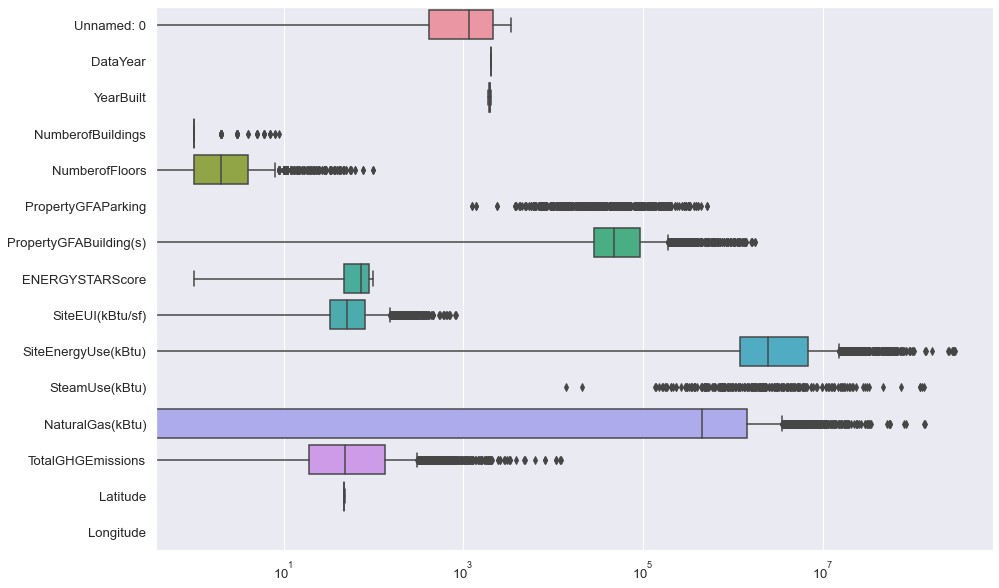

In [63]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)
plt.xscale('log')
sns.boxplot(data=data,  orient="h")

In [64]:
data.describe()

,Unnamed: 0,DataYear,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),NaturalGas(kBtu),TotalGHGEmissions,Latitude,Longitude
count,3220.000000,3220.000000,3220.000000,3220.000000,3213.000000,3220.000000,3.220000e+03,2169.000000,3219.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000
mean,1317.820807,2015.502174,1961.623913,1.024224,4.156552,13381.419876,9.754826e+04,64.857538,71.295837,7.406418e+06,4.750785e+05,1.644914e+06,160.722075,47.615712,-122.333212
std,996.931872,0.500073,32.637206,0.431773,6.648539,43540.297646,1.632600e+05,28.603078,72.736607,1.819883e+07,5.083160e+06,5.350522e+06,551.407662,0.048147,0.024587
min,0.000000,2015.000000,1900.000000,0.000000,0.000000,-2.000000,-5.055000e+04,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-0.800000,47.499170,-122.411820
25%,419.000000,2015.000000,1930.000000,1.000000,1.000000,0.000000,2.852325e+04,47.000000,33.100000,1.207988e+06,0.000000e+00,0.000000e+00,19.380000,47.585082,-122.343513
50%,1152.500000,2016.000000,1965.000000,1.000000,2.000000,0.000000,4.725100e+04,73.000000,51.200001,2.477429e+06,0.000000e+00,4.590740e+05,47.875000,47.612251,-122.333146
75%,2127.250000,2016.000000,1989.000000,1.000000,4.000000,0.000000,9.343650e+04,89.000000,81.050000,6.813668e+06,0.000000e+00,1.425761e+06,135.310000,47.648673,-122.322146
max,3375.000000,2016.000000,2015.000000,9.000000,99.000000,512608.000000,1.765970e+06,100.000000,834.400024,2.958126e+08,1.349435e+08,1.381912e+08,12307.160000,47.733870,-122.258640


#### Trouver des valeurs aberrantes

In [52]:
#PropertyGFAParking
data[data.PropertyGFAParking < 0]

,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,SecondLargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),NaturalGas(kBtu),TotalGHGEmissions,Latitude,Longitude
3136,2015,NonResidential,Small- and Mid-Sized Office,DOWNTOWN,2000,1.0,11.0,-2,68454,Office,Bank Branch,81.0,53.6,3670298.0,0.0,0.0,25.59,47.597252,-122.327747


In [53]:
#PropertyGFABuilding(s)
data.rename(columns={'PropertyGFABuilding(s)':'PropertyGFABuilding'},inplace= True)

In [54]:
data[data.PropertyGFABuilding < 0]

,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding,LargestPropertyUseType,SecondLargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),NaturalGas(kBtu),TotalGHGEmissions,Latitude,Longitude
3139,2015,NonResidential,Small- and Mid-Sized Office,MAGNOLIA / QUEEN ANNE,1982,1.0,5.0,97325,-43310,Office,NaN,65.0,64.0,3455247.0,0.0,0.0,24.09,47.624968,-122.359705
3322,2015,NonResidential,Other,NORTHEAST,2014,1.0,3.0,84198,-50550,Parking,Automobile Dealership,NaN,35.6,1389553.0,0.0,0.0,9.69,47.664111,-122.316639


In [55]:
# TotalGHGEmissions
data[data.TotalGHGEmissions < 0]

,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding,LargestPropertyUseType,SecondLargestPropertyUseType,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),NaturalGas(kBtu),TotalGHGEmissions,Latitude,Longitude
3206,2016,NonResidential,Small- and Mid-Sized Office,CENTRAL,2013,1.0,6.0,0,52000,Office,NaN,100.0,7.1,342726.0938,0.0,0.0,-0.8,47.61432,-122.31257


In [56]:
data.shape

(3220, 19)

In [57]:
data_NO_out = data[~((data.PropertyGFAParking < 0) | (data.PropertyGFABuilding < 0) | (data.TotalGHGEmissions < 0))]

In [58]:
data_NO_out.shape

(3216, 19)

In [59]:
new_df=data_NO_out.copy()

## 3. Feature Engineering

 Les années de construction

Nous allons regarder les distribution des années de construction des bâtiments de Seattle :

Text(0.5, 1.0, 'Distribution des années de construction des bâtiments\n')

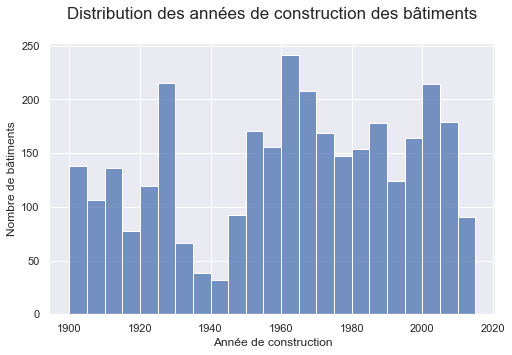

In [60]:
plt.figure(figsize=(8,5))
sns.histplot( x='YearBuilt',  data=new_df, bins=int((new_df.YearBuilt.max() - new_df.YearBuilt.min())/5))
plt.xlabel("Année de construction")
plt.ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n",  fontsize=17)


Plus que l'année de construction, il serait intéressant de traiter l'age des bâtiments pour réduire la dispersion des données et lier l'année des relevés. 

Nous allons donc créer cette nouvelle variable et supprimer l'année de construction :

Text(0.5, 1.0, "Distribution de l'âge des bâtiments\n")

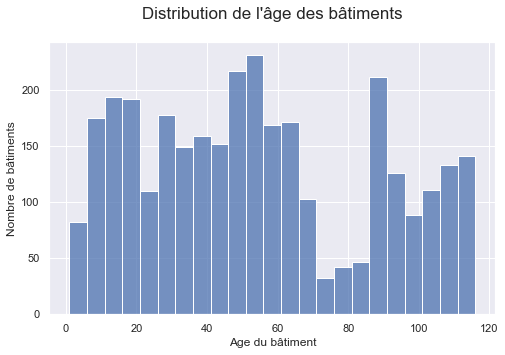

In [61]:
new_df['BuildingAge'] = new_df['DataYear'] - new_df['YearBuilt']
new_df.drop('YearBuilt', axis=1, inplace=True)

fig = plt.figure(figsize=(8,5))
ax = sns.histplot(data=new_df, x='BuildingAge', bins=int((new_df.BuildingAge.max() - new_df.BuildingAge.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title("Distribution de l'âge des bâtiments\n",  fontsize=17)


### Data Leakage

Il faut pas utiliser les données de relevés d'énergie (électricité, gaz...) car c'est une fuite de données (data leakage)

In [62]:
new_df.keys()

Index(['DataYear', 'BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking',
       'PropertyGFABuilding', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'Latitude', 'Longitude', 'BuildingAge'],
      dtype='object')

In [63]:
new_df.drop(['ENERGYSTARScore', 'SiteEUI(kBtu/sf)','SteamUse(kBtu)', 'NaturalGas(kBtu)'], axis=1, inplace= True)

### Valeurs manquantes

In [64]:
import missingno as msno

<AxesSubplot:>

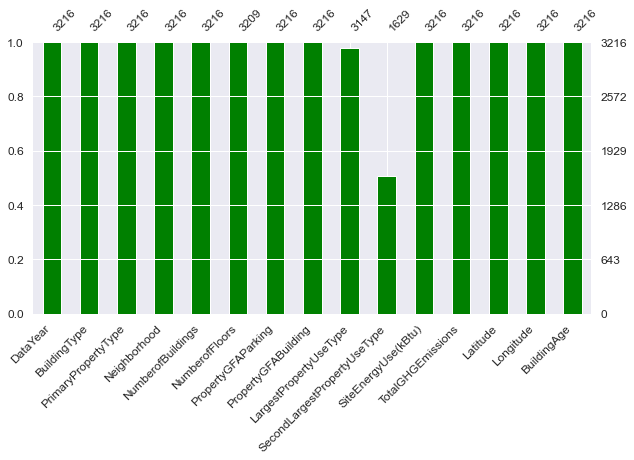

In [65]:
msno.bar(new_df,  figsize=(10,5), fontsize=12, color="green")

In [66]:
new_df.drop(['SecondLargestPropertyUseType'],axis=1, inplace =True)

In [67]:
new_df.to_csv("data_part2.csv")

In [31]:
new_df = pd.read_csv('C:/Users/azade/Desktop/OC/Projet 4/data_part2.csv')

### Convert type of variables

In [70]:
new_df['NumberofBuildings'] = new_df['NumberofBuildings'].astype(np.int64)

In [71]:
#df = pd.DataFrame(new_df,columns=['NumberofFloors'])
new_df['NumberofFloors'] = new_df['NumberofFloors'].fillna(0).astype(np.int64)

### Separation des données

from sklearn import model_selection

X_train, X_test, y_train, y_test = \
	model_selection.train_test_split(X, y_class,
                                	test_size=0.3 # 30% des données dans le jeu de test
                                	)


In [3]:
from sklearn.model_selection import train_test_split

In [63]:
# split "SiteEnergyUse" into train test sets
X= new_df.drop(columns=['TotalGHGEmissions','SiteEnergyUse(kBtu)'])
y= new_df[['TotalGHGEmissions','SiteEnergyUse(kBtu)']]

#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [49]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3216 non-null   int64  
 1   DataYear                3216 non-null   int64  
 2   BuildingType            3216 non-null   object 
 3   PrimaryPropertyType     3216 non-null   object 
 4   Neighborhood            3216 non-null   object 
 5   NumberofBuildings       3216 non-null   float64
 6   NumberofFloors          3209 non-null   float64
 7   PropertyGFAParking      3216 non-null   int64  
 8   PropertyGFABuilding     3216 non-null   int64  
 9   LargestPropertyUseType  3147 non-null   object 
 10  SiteEnergyUse(kBtu)     3216 non-null   float64
 11  TotalGHGEmissions       3216 non-null   float64
 12  Latitude                3216 non-null   float64
 13  Longitude               3216 non-null   float64
 14  BuildingAge             3216 non-null   

### Pipelines

In [51]:
# use when different features need different preprocessing
from sklearn.compose import make_column_transformer

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
#from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.compose import make_column_transformer
from sklearn.linear_model import SGDClassifier

In [53]:
numerical_cols = ['NumberofBuildings','NumberofFloors','BuildingAge']

categorical_cols = ['BuildingType','PrimaryPropertyType', 'LargestPropertyUseType']

In [54]:
# Pipeline pour traiter les variables numériques
num_pipeline = make_pipeline( SimpleImputer(), # Inputation des valeurs manquantes
    StandardScaler()) # Normalisation des données
    
# Pipeline pour traiter les variables catégorielles
cat_pipeline = make_pipeline(SimpleImputer(strategy= 'most_frequent'),
    OneHotEncoder())

In [70]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000020064662D30>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000020064662760>)])

In [55]:
preprocessor= make_column_transformer((num_pipeline,numerical_cols),
                         (cat_pipeline,categorical_cols), remainder='passthrough')

In [48]:
model= make_pipeline(preprocessor,SGDClassifier())
model.fit(X,y)

ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.

In [57]:
from sklearn.compose import make_column_selector

In [64]:
numerical_cols = make_column_selector(dtype_include=np.number)

categorical_cols =  make_column_selector(dtype_exclude=np.number)

In [65]:
# Pipeline pour traiter les variables numériques
num_pipeline = make_pipeline( SimpleImputer(), # Inputation des valeurs manquantes
    StandardScaler()) # Normalisation des données
    
# Pipeline pour traiter les variables catégorielles
cat_pipeline = make_pipeline(SimpleImputer(strategy= 'most_frequent'),
    OneHotEncoder())

In [66]:
preprocessor= make_column_transformer((num_pipeline,numerical_cols),
                         (cat_pipeline,categorical_cols), remainder='passthrough')

In [67]:
model= make_pipeline(preprocessor,SGDClassifier())
model.fit(X,y)

C:\Users\azade\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: Unknown label type: (array([0.00000000e+00, 1.14410000e+04, 1.68089004e+04, ...,
       2.91614432e+08, 2.93090784e+08, 2.95812640e+08]),)

In [172]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [208]:


# Pipeline pour les variables numériques
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(missing_values='NAN', strategy='median', fill_value=None)), # Inputation des valeurs manquantes
    ('std_scaler', StandardScaler()), # Normalisation des données
    ])

# Pipeline pour les variables catégorielles
cat_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder()),
    ('std_scaler', StandardScaler()), # Normalisation des données
    ('imputer', SimpleImputer(strategy='mean')), # Inputation des valeurs manquantes
    ])
df_num_tr = num_pipeline.fit_transform(new_df)
imp.fit(data_frame_features)

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'NonResidential'

In [180]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

In [182]:
df_num_tr = num_pipline.fit_transform(new_df)

NameError: name 'num_pipline' is not defined

In [ ]:
clf = LinearRegression()
clf.fit(trainingData, trainingScores)
print("LinearRegression")
print(clf.predict(predictionData))

In [118]:
numeric_features = list(new_df.select_dtypes(include=['int', 'float']).columns)
numeric_features

['NumberofBuildings',
 'NumberofFloors',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'Latitude',
 'Longitude']

In [152]:
# Simple example for beginers how to adress ""
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

In [205]:
numeric_features = new_df['NumberofBuildings']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['LargestPropertyUseType']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

df_num_tr = numeric_transformer.fit_transform(numeric_features)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. ... 1. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [155]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y1)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y1))
print(utils.multiclass.type_of_target(y1.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[2408 2523 3172 ... 2271  366  746]
continuous
multiclass
multiclass


In [167]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
       ('imputer', SimpleImputer(strategy="median")),
       
       ('std_scaler', StandardScaler() ),
])


df_num_tr = num_pipline.fit_transform(new_df)

NameError: name 'num_pipline' is not defined

In [168]:
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

trainingData    = np.array([ [2.3, 4.3, 2.5],  [1.3, 5.2, 5.2],  [3.3, 2.9, 0.8],  [3.1, 4.3, 4.0]  ])
trainingScores  = np.array( [3.4, 7.5, 4.5, 1.6] )
predictionData  = np.array([ [2.5, 2.4, 2.7],  [2.7, 3.2, 1.2] ])

for item in classifiers:
    print(item)
    clf = item
    clf.fit(trainingData, trainingScores)
    print(clf.predict(predictionData),'\n')

SVR()
[3.87234245 4.18138031] 

SGDRegressor()
[1.58514679 3.21097383] 

BayesianRidge()
[4.24785862 4.24601844] 

LassoLars()
[4.25 4.25] 

ARDRegression()
[4.25163629 3.94012149] 

PassiveAggressiveRegressor()
[3.71312078 5.12864009] 

TheilSenRegressor(max_subpopulation=10000)
[15.72023529  6.46666667] 

LinearRegression()
[15.72023529  6.46666667] 



In [138]:
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

ValueError: A given column is not a column of the dataframe

In [336]:
data_with_nan['LargestPropertyUseType'].fillna(X_train_with_nan['LargestPropertyUseType'].mode()[0], inplace= True)

data_with_nan['NumberofFloors'].fillna(X_train_with_nan['NumberofFloors'].median(), inplace= True)

In [418]:
new_df.keys()

Index(['Unnamed: 0', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'Neighborhood', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFAParking', 'PropertyGFABuilding', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions', 'Latitude', 'Longitude', 'BuildingAge'],
      dtype='object')

#### Remplir les valeurs manquantes

In [337]:
df=data_with_nan.copy()

In [338]:
df.keys()

Index(['Unnamed: 0', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFAParking', 'PropertyGFABuilding', 'LargestPropertyUseType',
       'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'Latitude', 'Longitude'],
      dtype='object')

### OneHotEncoder

In [369]:
from sklearn.preprocessing import OneHotEncoder

In [87]:
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(X[categorical_columns]);

In [88]:
X_df = pd.DataFrame(columns = ohe.get_feature_names(),data = ohe.fit_transform(X[categorical_columns]))

In [89]:
X_df.reset_index(drop=True)

,x0_NonResidential,x0_Nonresidential COS,x0_Nonresidential WA,x0_SPS-District K-12,x1_College/University,x1_Distribution Center,x1_Hospital,x1_Hotel,x1_K-12 School,x1_Laboratory,x1_Large Office,x1_Medical Office,x1_Mixed Use Property,x1_Other,x1_Refrigerated Warehouse,x1_Restaurant,x1_Retail Store,x1_Self-Storage Facility,x1_Senior Care Community,x1_Small- and Mid-Sized Office,x1_Supermarket/Grocery Store,x1_Warehouse,x1_Worship Facility,x2_BALLARD,x2_Ballard,x2_CENTRAL,x2_Central,x2_DELRIDGE,x2_DELRIDGE NEIGHBORHOODS,x2_DOWNTOWN,x2_Delridge,x2_EAST,x2_GREATER DUWAMISH,x2_LAKE UNION,x2_MAGNOLIA / QUEEN ANNE,x2_NORTH,x2_NORTHEAST,x2_NORTHWEST,x2_North,x2_Northwest,x2_SOUTHEAST,x2_SOUTHWEST,x3_Automobile Dealership,x3_College/University,x3_Distribution Center,x3_Financial Office,x3_Hospital (General Medical & Surgical),x3_Hotel,x3_K-12 School,x3_Laboratory,x3_Manufacturing/Industrial Plant,x3_Medical Office,x3_Multifamily Housing,x3_Non-Refrigerated Warehouse,x3_Office,x3_Other,x3_Other - Entertainment/Public Assembly,x3_Other - Lodging/Residential,x3_Other - Mall,x3_Other - Public Services,x3_Other - Recreation,x3_Other - Services,x3_Other/Specialty Hospital,x3_Parking,x3_Refrigerated Warehouse,"x3_Repair Services (Vehicle, Shoe, Locksmith, etc)",x3_Restaurant,x3_Retail Store,x3_Self-Storage Facility,x3_Senior Care Community,x3_Social/Meeting Hall,x3_Strip Mall,x3_Supermarket/Grocery Store,x3_Worship Facility
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3214,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3215,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [94]:
data_new = pd.merge(X[numerical_columns],X_df,left_index=True,right_index=True)

In [95]:
print(X.shape)
print(y.shape)

(1570, 90)
(3218, 2)


In [257]:
Y['log-SiteEnergyUse(kBtu)'] = np.log(1+Y['SiteEnergyUse(kBtu)'])
Y['log-TotalGHGEmissions'] = np.log(1+Y['TotalGHGEmissions'])

In [267]:
X.to_csv('Xs_no_es.csv', index=False)
Y.to_csv('Ys_no_es.csv', index=False)

In [268]:
Y.describe()

,TotalGHGEmissions,SiteEnergyUse(kBtu),log-SiteEnergyUse(kBtu),log-TotalGHGEmissions
count,6689.000000,6.689000e+03,6689.000000,6689.000000
mean,115.054023,5.201395e+06,14.525225,3.548119
std,479.150538,1.815198e+07,1.404323,1.431935
min,0.000000,0.000000e+00,0.000000,0.000000
25%,9.450000,9.215979e+05,13.733865,2.346602
50%,33.260000,1.791866e+06,14.398769,3.533978
75%,91.530000,4.145920e+06,15.237636,4.527533
max,16870.980000,8.739237e+08,20.588504,9.733410


In [ ]:
plt.subplot(4,1,1)
sns.countplot(y="BuildingType", data=data)
plt.title("Building Type", fontsize=20)

plt.subplot(4,1,2)
sns.countplot(y="PrimaryPropertyType", data=data)
plt.title("Primary Property Type", fontsize=20)

C:\Users\azade\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\azade\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log-TotalGHGEmissions', ylabel='Density'>

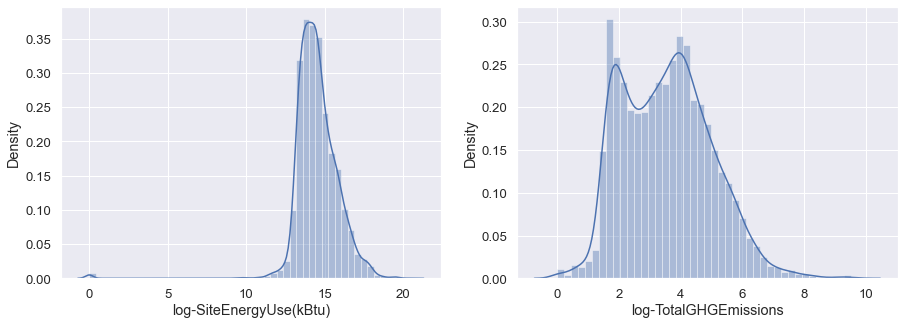

In [275]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1.2)

plt.subplot(1,2,1)
sns.distplot(Y['log-SiteEnergyUse(kBtu)'])


plt.subplot(1,2,2)
sns.distplot(Y['log-TotalGHGEmissions'])


### Normalization for 'SiteEnergyUse(kBtu)'

In [26]:
from sklearn import preprocessing

In [27]:
std_scale = preprocessing.StandardScaler().fit(X_train_eng)
X_train_eng_std = std_scale.transform(X_train_eng)
X_test_eng_std = std_scale.transform(X_test_eng)

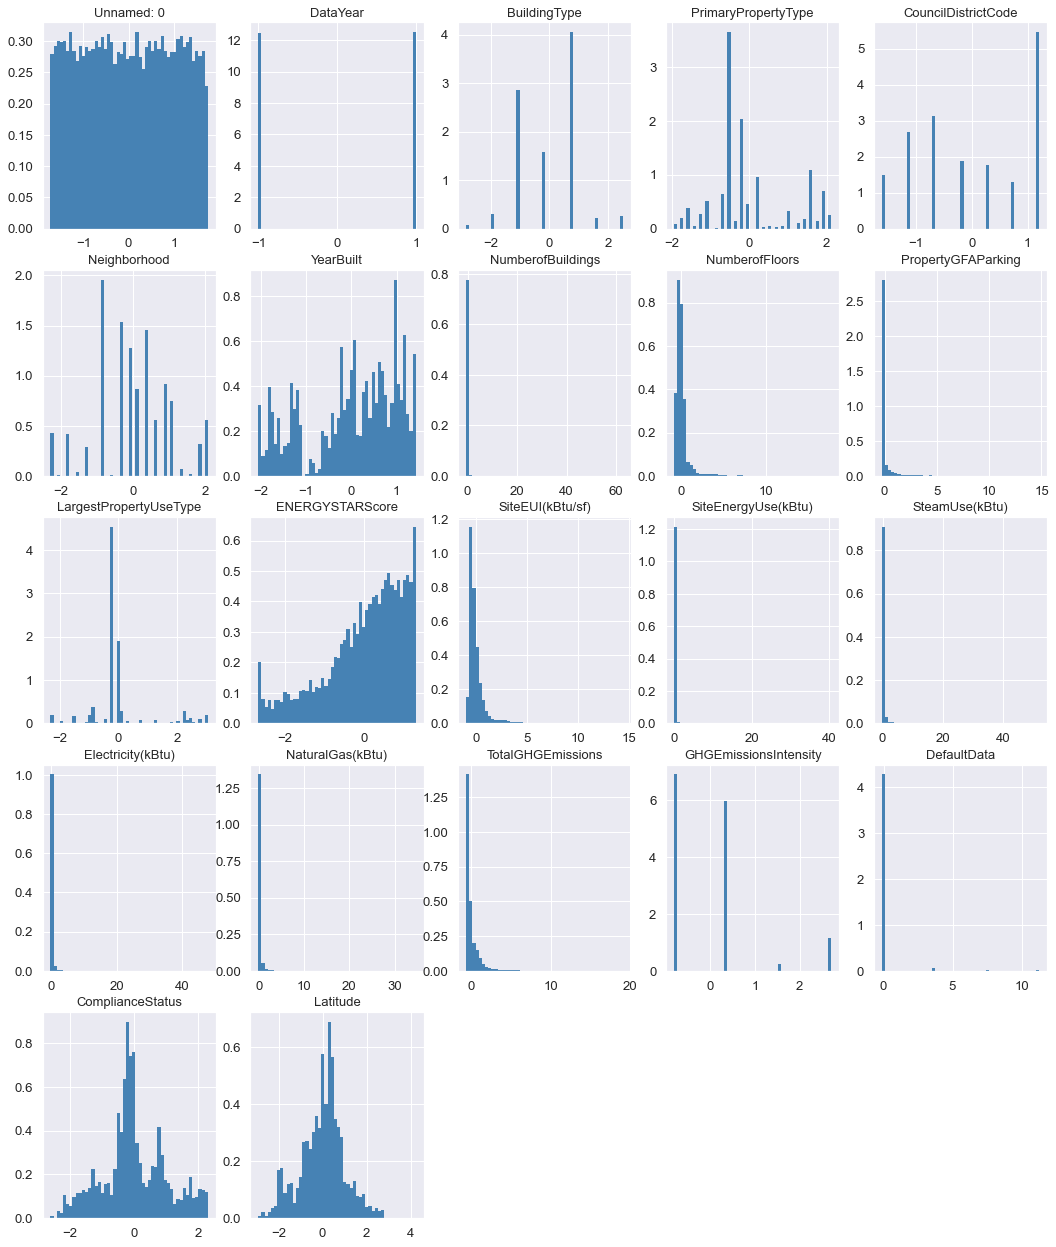

In [39]:
sns.set(font_scale=1.2)
fig = plt.figure(figsize=(18, 22))
for feat_idx in range(X_train_eng_std.shape[1]):
    ax = fig.add_subplot(5,5, (feat_idx+1))
    h = ax.hist(X_train_eng_std[:, feat_idx], bins=50, color = 'steelblue', density=True,edgecolor='none')
    ax.set_title(data.columns[feat_idx], fontsize=13)


Nous allons maintenant utiliser la méthode __"GridSearchCV"__ pour faire une validation croisée du paramètre k d’un kNN (le nombre de plus proches voisins) sur le jeu d’entraînement :

### GridSearchCV

In [ ]:
from sklearn import neighbors

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15, 17]}

In [89]:
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
from sklearn import model_selection

In [92]:
from sklearn.model_selection import cross_validate

In [93]:
# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)


In [94]:
# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train_eng_std, y_train_eng)

C:\Users\azade\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17]},
             scoring='accuracy')

In [95]:
# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 15}


In [102]:
# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.15f} (+/-{:.08f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Résultats de la validation croisée :
accuracy = 0.000000000000000 (+/-0.00000000) for {'n_neighbors': 3}
accuracy = 0.000000000000000 (+/-0.00000000) for {'n_neighbors': 5}
accuracy = 0.000000000000000 (+/-0.00000000) for {'n_neighbors': 7}
accuracy = 0.000186741363212 (+/-0.00074697) for {'n_neighbors': 9}
accuracy = 0.000373482726424 (+/-0.00091484) for {'n_neighbors': 11}
accuracy = 0.000373482726424 (+/-0.00091484) for {'n_neighbors': 13}
accuracy = 0.000560224089636 (+/-0.00091484) for {'n_neighbors': 15}
accuracy = 0.000560224089636 (+/-0.00091484) for {'n_neighbors': 17}


#### la performance sur le jeu de test

In [ ]:
from sklearn import metrics

In [108]:
y_pred_eng = clf.predict(X_test_eng_std)
print("\nSur le jeu de test : {:.20f}".format(metrics.accuracy_score(y_test_eng, y_pred_eng)))



Sur le jeu de test : 0.00000000000000000000
